# Course Code: DS4003 
# Course Name: Principles and Techniques for Data Science 
# Lab Session: 03 - Exploratory Data Analysis

### Some contents of the lab are adapted from UC Berkeley's Data100 course. In this lab, we'll go through a series of EDA tasks on a rental dataset.

## From the Lecutre

### Key Task in EDA
1. **Data Understanding** 
2. **Data Cleaning** 
3. **Pattern Recognition** 
4. Hypothesis Generation 
5. Feature Selection 
6. Feature Engineering 

### Goals of EDA
#### We determine: 
1. **Data Types**: What kinds of data do we have?
2. **Granuality**: How is the resolution of data?
3. **Scope**: How (in)complete are the data?
4. **Temporality**: How are the data situated in time? 
5. **Faithfulness**:How accurately do the data describe the world?


### Some important Imports 

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings 
warnings.simplefilter('ignore')
%matplotlib inline

You are given a dataset  containing rental listings data scraped from Craigslist. Craigslist is a popular onlin advertising website.

## Read in Data and Compute Basic Summary Statistics

In [38]:
df = pd.read_csv("craiglist_rental.csv")
df.head()

,Unnamed: 0,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
0,_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd...,6809166875,6500,$6500 / 3br - 1900ft2 - 1/2 MTH FREE! Unfurnis...,\r\n QR Code Link to This Post\r\n ...,37.894549,-122.263756,2019-02-01T09:54:18-0800,2019-02-05T06:50:49-0800,3BR / 3Ba,_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd...,3,3,1900.0
1,_eby_apa_d_1-bedroom-pet-friendly-building-146...,6817699544,1795,$1795 / 1br - 1 bedroom Pet-friendly Building!...,\r\n QR Code Link to This Post\r\n ...,37.803334,-122.266724,2019-02-12T10:14:49-0800,2019-02-12T10:14:50-0800,1BR / 1Ba,_eby_apa_d_1-bedroom-pet-friendly-building-146...,1,1,NaN
2,_eby_apa_d_1-bedroom-pet-friendly-building-146...,6817715072,1995,$1995 / 1br - 1 bedroom Pet-friendly Building!...,\r\n QR Code Link to This Post\r\n ...,37.803334,-122.266724,2019-02-12T10:29:31-0800,2019-02-12T10:35:29-0800,1BR / 1Ba,_eby_apa_d_1-bedroom-pet-friendly-building-146...,1,1,NaN
3,_eby_apa_d_1-br-1-ba-berkeley-available-now_68...,6817370571,2200,"$2200 / 1br - 1 BR / 1 BA Berkeley, Available ...",\r\n QR Code Link to This Post\r\n ...,37.857026,-122.280080,2019-02-11T22:20:53-0800,2019-02-12T15:28:04-0800,1BR / 1Ba,_eby_apa_d_1-br-1-ba-berkeley-available-now_68...,1,1,NaN
4,_eby_apa_d_1-br-with-parking-near-downtown_681...,6814999655,1950,$1950 / 1br - 500ft2 - 1 br with parking near ...,\r\n QR Code Link to This Post\r\n ...,37.866400,-122.257000,2019-02-08T16:37:38-0800,NaN,1BR / 1Ba,_eby_apa_d_1-br-with-parking-near-downtown_681...,1,1,500.0


## Task: Find out what types of data we have in the dataset.


In [39]:
## YOUR CODE
print(f'shape of df: {df.shape}\n')
df.info()

shape of df: (2139, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2139 non-null   object 
 1   id          2139 non-null   int64  
 2   price       2139 non-null   int64  
 3   title       2139 non-null   object 
 4   body        2139 non-null   object 
 5   lat         2135 non-null   float64
 6   long        2135 non-null   float64
 7   posted      2139 non-null   object 
 8   updated     1100 non-null   object 
 9   header      2139 non-null   object 
 10  file        2139 non-null   object 
 11  bedrooms    2139 non-null   int64  
 12  bath        2139 non-null   int64  
 13  sqft        1399 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 234.1+ KB


## The column ```Unnamed: 0```
What is in it? 

In [40]:
item = df.iloc[0]
print(item["Unnamed: 0"])

_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd_6809166875.html


It does contains the html file name published in craiglist. Like ID, this column will have unique values. 
So, we move this column from regular column to index. 

In [41]:
df.index = df['Unnamed: 0']
df = df.drop(columns = 'Unnamed: 0')
df.head()
print(df.index)

Index(['_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd_6809166875.html',
       '_eby_apa_d_1-bedroom-pet-friendly-building-1461_6817699544.html',
       '_eby_apa_d_1-bedroom-pet-friendly-building-1461_6817715072.html',
       '_eby_apa_d_1-br-1-ba-berkeley-available-now_6817370571.html',
       '_eby_apa_d_1-br-with-parking-near-downtown_6814999655.html',
       '_eby_apa_d_1-mth-free-unfurnished-modern-3bd-3bth_6814991144.html',
       '_eby_apa_d_1ba-spacious-apt-in-great-area-private_6807929183.html',
       '_eby_apa_d_2-bed-2-bath-in-great-location-dont_6813099037.html',
       '_eby_apa_d_2-bed-2-bath-new-remodel-on-temescal_6817697003.html',
       '_eby_apa_d_2-bed-2ba-15-garage-nice-east-bay-condo_6817221879.html',
       ...
       '_eby_apa_d_vallejo-2bd-2ba-controlled-access_6812543832.html',
       '_eby_apa_d_vallejo-2bd-2ba-dishwasher-located-in_6814678180.html',
       '_eby_apa_d_vallejo-balconies-patios-or-decks_6817254026.html',
       '_eby_apa_d_vallejo-book-your

## Task: Use pandas functions to get a statistical summary of the dataset.

### Let's find the amount of NaN values in our dataset.

In [42]:
df.isna().sum()

id             0
price          0
title          0
body           0
lat            4
long           4
posted         0
updated     1039
header         0
file           0
bedrooms       0
bath           0
sqft         740
dtype: int64

Based on what we see above, we will need to handle the missing data in some columns.

## Task: Complete the following Functions 

In [43]:
from datetime import datetime, timedelta

# format of date time in the data frame
item = df['posted'][0]
print(item)
print(type(item))

2019-02-01T09:54:18-0800
<class 'str'>


In [44]:
# function to convert a string to datetime
def str_to_date_time(date_string): 
    return datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S%z')

dt_item = str_to_date_time(item)
print(dt_item)
print(type(dt_item))

2019-02-01 09:54:18-08:00
<class 'datetime.datetime'>


In [45]:
# function to add a day to datetime obejct
def add_day(dt_object, day=1): 
    return dt_object + timedelta(day)

dt_item_added = add_day(dt_item)
print(dt_item_added)
print(type(dt_item_added))

2019-02-02 09:54:18-08:00
<class 'datetime.datetime'>


In [46]:
# function convert the datetime object to string of the given format e.g., 2019-02-01T09:54:18-0800
def date_time_to_str(dt_object): 
    return datetime.strftime(dt_object, '%Y-%m-%dT%H:%M:%S%z')

str_item = date_time_to_str(dt_item_added)
print(str_item)
print(type(str_item))

2019-02-02T09:54:18-0800
<class 'str'>


## Now we use the above defined function to insert fake entries into the 'updated' column since this column has few actual entries

In [47]:
indices = np.random.choice(df.shape[0], replace=False, size=(50,) )

df.reset_index(inplace=True)
rows = [] 

for i in indices: 
    idata = df.iloc[i].copy() 
    updated = idata['updated']
    if (type(updated) == str and updated is not None) or (type(updated) == float and  not np.isnan(updated)): 
        dt_obj = str_to_date_time(updated)
        dt_obj = add_day(dt_obj)
        date_str = date_time_to_str(dt_obj)
        idata['updated'] = date_str 
        idata['Unnamed: 0'] = str(idata['Unnamed: 0']) + str(i)
        rows.append(idata)
    
frame = pd.DataFrame(rows)
df = pd.concat([df, frame])

df.isna().sum()

Unnamed: 0       0
id               0
price            0
title            0
body             0
lat              4
long             4
posted           0
updated       1039
header           0
file             0
bedrooms         0
bath             0
sqft           754
dtype: int64

In [48]:
print(f'Total Number of entry: {df.shape[0]}')
print(f"Total Number of unique id: {len(pd.unique(df['id'].values))}")

Total Number of entry: 2170
Total Number of unique id: 2139


In [49]:
(df
   .sort_values('updated', ascending=False)
   .groupby('id', as_index=False)
   .first()
   .set_index('Unnamed: 0')
).head()

,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
Unnamed: 0,,,,,,,,,,,,,
_eby_apa_d_oakland-first-floor-2-bedroom-near_6788556664.html,6788556664,2095,$2095 / 2br - First floor 2 bedroom near Highl...,\r\n QR Code Link to This Post\r\n ...,37.794394,-122.233596,2019-01-06T13:58:00-0800,2019-02-11T15:21:12-0800,2BR / 1Ba,_eby_apa_d_oakland-first-floor-2-bedroom-near_...,2,1,NaN
_eby_apa_d_oakland-ground-floor-2-bedroom-with_6789660103.html1321,6789660103,2495,$2495 / 2br - Ground Floor 2 bedroom with priv...,\r\n QR Code Link to This Post\r\n ...,37.820275,-122.253068,2019-01-07T21:59:11-0800,2019-02-07T09:16:18-0800,2BR / 1.5Ba,_eby_apa_d_oakland-ground-floor-2-bedroom-with...,2,5,NaN
_eby_apa_d_berkeleybr-786ft-fall-security-deposit_6789926479.html,6789926479,3500,$3500 / 2br - 786ft2 - $3500 / 2br - 786ft - F...,\r\n QR Code Link to This Post\r\n ...,37.874825,-122.269080,2019-01-08T09:14:51-0800,2019-02-06T14:48:27-0800,2BR / 1Ba,_eby_apa_d_berkeleybr-786ft-fall-security-depo...,2,1,786.0
_eby_apa_d_oakland-amazing-remodeled-2br-1ba-walk_6790076454.html,6790076454,2995,"$2995 / 2br - Amazing, Remodeled 2BR-1BA walk ...",\r\n QR Code Link to This Post\r\n ...,37.813005,-122.254293,2019-01-08T11:30:55-0800,2019-02-06T12:29:36-0800,2BR / 1Ba,_eby_apa_d_oakland-amazing-remodeled-2br-1ba-w...,2,1,NaN
_eby_apa_d_oakland-available-one-bedroom-one_6790438871.html,6790438871,1850,$1850 / 1br - Available one bedroom one bathro...,\r\n QR Code Link to This Post\r\n ...,37.812524,-122.257526,2019-01-08T19:23:23-0800,2019-02-06T16:44:38-0800,1BR / 1Ba,_eby_apa_d_oakland-available-one-bedroom-one_6...,1,1,NaN


## Task: Use an appropriate approach to handle the missing data in the column 'sqft'

In [50]:
# filling with mean values

fill_mean = df.copy()
fill_mean['sqft'] = fill_mean['sqft'].fillna(value=fill_mean['sqft'].mean())

# Mean can in this case distrort since we have a lot of null values. We can instead get the mean after using groupby aggregation. 
# We can also use intrapolation, regression or nearest neighbor. 


## Task: Ensure the columns with date and time to a datetime format

In [51]:
### YOUR CODE HERE

df = fill_mean.assign(posted=[str_to_date_time(val) for val in fill_mean['posted']])

#df = fill_mean.assign(posted=[str_to_date_time(val) for val in fill_mean['updated']])


In [52]:
df.isna().sum()

Unnamed: 0       0
id               0
price            0
title            0
body             0
lat              4
long             4
posted           0
updated       1039
header           0
file             0
bedrooms         0
bath             0
sqft             0
dtype: int64

## Task: Remove Multiple Listings with Same ID
If there are multiple listings with the same ID, keep the listing updated most recently.

In [53]:
### YOUR CODE HERE
print(len(df['id'].unique()))
df= df.drop_duplicates(subset='id', keep='last')
print(len(df['id'].unique()))

2139
2139


### Outliers: Square footage

In [54]:
df['sqft'].describe()

count     2139.000000
mean      1043.259220
std       2063.701740
min          1.000000
25%        773.500000
50%       1043.030367
75%       1043.030367
max      94602.000000
Name: sqft, dtype: float64

In [55]:
df['sqft'].isnull().sum()

0

In [56]:
df['sqft'].sort_values().head()

1507      1.0
1520     90.0
300     100.0
2027    101.0
483     135.0
Name: sqft, dtype: float64

In [57]:
df['sqft'].sort_values(ascending=False).head()

1375    94602.0
1152    10000.0
1819     4800.0
1531     4060.0
1882     3200.0
Name: sqft, dtype: float64

## Task: Remove unusual apartment sizes
Find out the indices of apartments which are smaller than 100 sqft or larger than 5000 sqft. Drop the corresponding indices


In [58]:
## YOUR CODE HERE
print(len(df['sqft']))
lst = df.index[df['sqft'] <= 100].to_list()
lst += df.index[df['sqft'] >= 5000].to_list()
df = df.drop(index = lst)
print(len(df['sqft']))

2139
2134


### Outliers: Latitude and Longitude

UC Berkeley's latitude is 37.871853 and longitude -122.258423. 

There are a few outlying units in terms of latitude or longitude.

Examine and discard listings with latitude or longitude beyond 0.3 of UC Berkeley.   



In [59]:
lg = -122.258423
lt = 37.871853

In [60]:
df[['long','lat']].describe()

,long,lat
count,2130.000000,2130.000000
mean,-122.252314,37.841967
std,0.569355,0.121654
min,-122.481502,32.892980
25%,-122.285100,37.808500
50%,-122.266648,37.834923
75%,-122.250942,37.867726
max,-96.076540,38.129373


## Task: Remove far off apartments
Use the code for finding apartment indices to get listings with with latitude or longitude beyond 0.3 of UC Berkeley coordinates.


In [61]:
## YOUR CODE HERE
lg_tol_upper = lg +0.3
lg_tol_lower = lg -0.3

print(len(df['long']))

lst = df.index[df['long'] >= lg_tol_upper].to_list()
lst += df.index[df['long'] <= lg_tol_lower].to_list()

df = df.drop(index = lst)

print(len(df['long']))

2134
2127


In [62]:
lt_tol_upper = lt +0.3
lt_tol_lower = lt -0.3

print(len(df['lat']))

lst = df.index[df['lat'] >= lt_tol_upper].to_list()
lst += df.index[df['lat'] <= lt_tol_lower].to_list()

df = df.drop(index = lst)

print(len(df['lat']))

2127
2125


## Task: Inspection of units recorded as having 5 bathrooms but only 1 bedroom reveals a likely error in the data: These units actually have 1.5 bathrooms. Find a way to fix this this the dataset.

In [63]:
df.loc[(df['bath'] == 5) & (df['bedrooms'] == 1), 'bath'] = 1.5

## We will use visualizations and aggregations to see some granularity


### Numbers of Bedrooms and Bathrooms

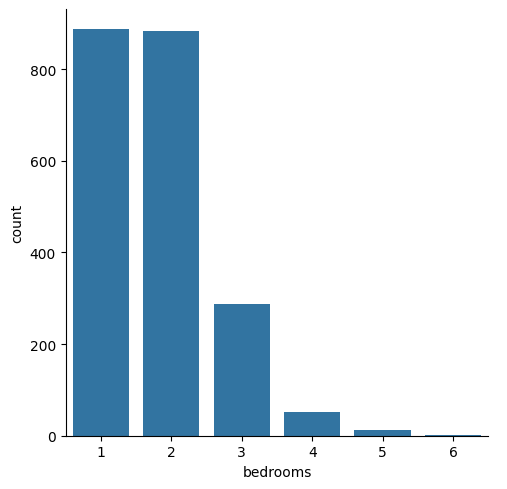

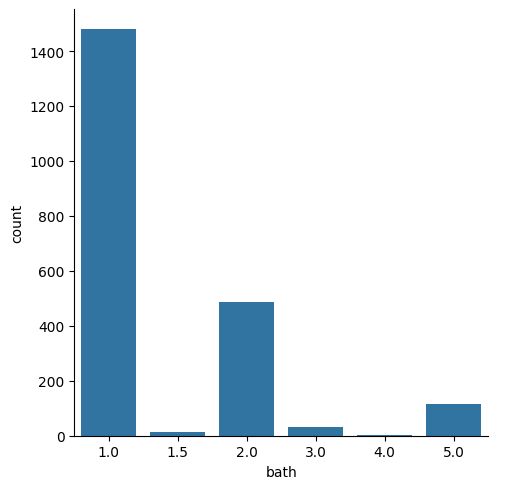

In [64]:
sns.catplot(x='bedrooms', kind='count', data=df)
sns.catplot(x='bath', kind='count', data=df)

### Task: Price vs. Number of Bedrooms, Number of Bathrooms, and Sqft
What are the mean and median prices of properties grouped by the number of bedrooms, and how do these statistics change when further grouped by the number of bathrooms?

In [65]:
df.head()

,Unnamed: 0,id,price,title,body,lat,long,posted,updated,header,file,bedrooms,bath,sqft
0,_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd...,6809166875,6500,$6500 / 3br - 1900ft2 - 1/2 MTH FREE! Unfurnis...,\r\n QR Code Link to This Post\r\n ...,37.894549,-122.263756,2019-02-01 09:54:18-08:00,2019-02-05T06:50:49-0800,3BR / 3Ba,_eby_apa_d_1-2-mth-free-unfurnished-modern-3bd...,3,3.0,1900.000000
1,_eby_apa_d_1-bedroom-pet-friendly-building-146...,6817699544,1795,$1795 / 1br - 1 bedroom Pet-friendly Building!...,\r\n QR Code Link to This Post\r\n ...,37.803334,-122.266724,2019-02-12 10:14:49-08:00,2019-02-12T10:14:50-0800,1BR / 1Ba,_eby_apa_d_1-bedroom-pet-friendly-building-146...,1,1.0,1043.030367
2,_eby_apa_d_1-bedroom-pet-friendly-building-146...,6817715072,1995,$1995 / 1br - 1 bedroom Pet-friendly Building!...,\r\n QR Code Link to This Post\r\n ...,37.803334,-122.266724,2019-02-12 10:29:31-08:00,2019-02-12T10:35:29-0800,1BR / 1Ba,_eby_apa_d_1-bedroom-pet-friendly-building-146...,1,1.0,1043.030367
3,_eby_apa_d_1-br-1-ba-berkeley-available-now_68...,6817370571,2200,"$2200 / 1br - 1 BR / 1 BA Berkeley, Available ...",\r\n QR Code Link to This Post\r\n ...,37.857026,-122.280080,2019-02-11 22:20:53-08:00,2019-02-12T15:28:04-0800,1BR / 1Ba,_eby_apa_d_1-br-1-ba-berkeley-available-now_68...,1,1.0,1043.030367
4,_eby_apa_d_1-br-with-parking-near-downtown_681...,6814999655,1950,$1950 / 1br - 500ft2 - 1 br with parking near ...,\r\n QR Code Link to This Post\r\n ...,37.866400,-122.257000,2019-02-08 16:37:38-08:00,NaN,1BR / 1Ba,_eby_apa_d_1-br-with-parking-near-downtown_681...,1,1.0,500.000000


In [66]:
## YOUR CODE HERE
series = df.groupby(by=['bedrooms'])['price'].mean()
series

bedrooms
1    2378.545660
2    2955.761312
3    3550.795139
4    4619.588235
5    4612.692308
6    5997.500000
Name: price, dtype: float64

In [67]:
series = df.groupby(by=['bedrooms', 'bath'])['price'].mean()
print(series)

bedrooms  bath
1         1.0     2361.903935
          1.5     3063.333333
          2.0     2938.636364
2         1.0     2737.141561
          2.0     3342.000000
          5.0     3216.492308
3         1.0     3006.295082
          2.0     3567.594286
          3.0     4931.500000
          5.0     3838.815789
4         1.0     3398.333333
          2.0     4078.760000
          3.0     4890.833333
          5.0     5885.909091
5         2.0     3673.000000
          3.0     4212.500000
          4.0     6750.000000
          5.0     6000.000000
6         2.0     6000.000000
          3.0     5995.000000
Name: price, dtype: float64


We can also use boxplots to gain some further insights into the distributions of price, number of bedrooms, number of bathrooms, and sqft. See examples below:

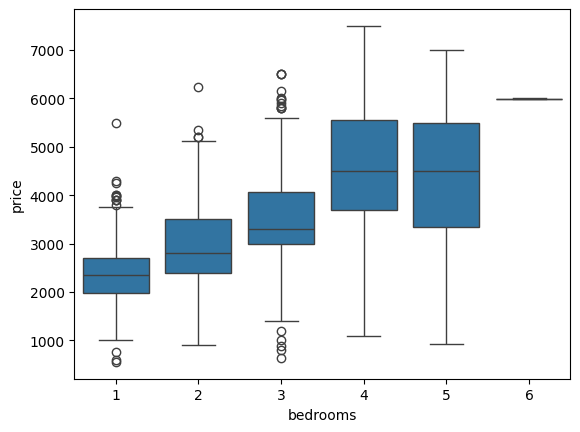

In [68]:
gr = sns.boxplot(x='bedrooms', y='price', data=df)


<Axes: xlabel='bath', ylabel='price'>

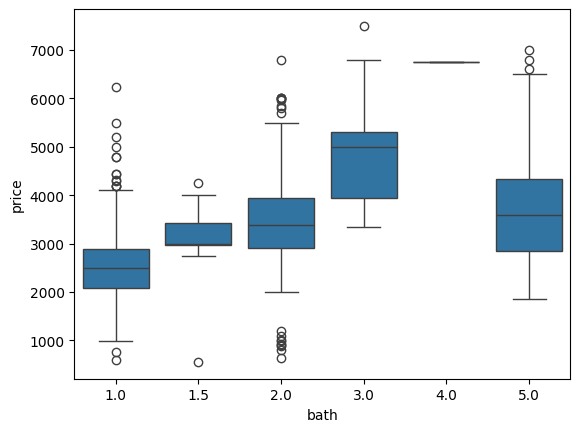

In [69]:
sns.boxplot(x='bath', y='price', data=df)

## Task: What is the distribution of square footage (sqft) for different numbers of bedrooms in the dataset?

<Axes: xlabel='bedrooms', ylabel='sqft'>

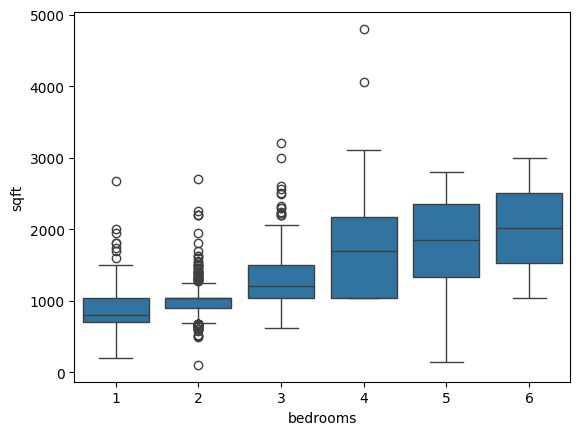

In [70]:
## YOUR CODE HERE
sns.boxplot(data=df, x='bedrooms', y='sqft')

## Task: What insights can be gained regarding the relationship between the number of bathrooms (bath) and the square footage (sqft) of the apartments in the dataset?

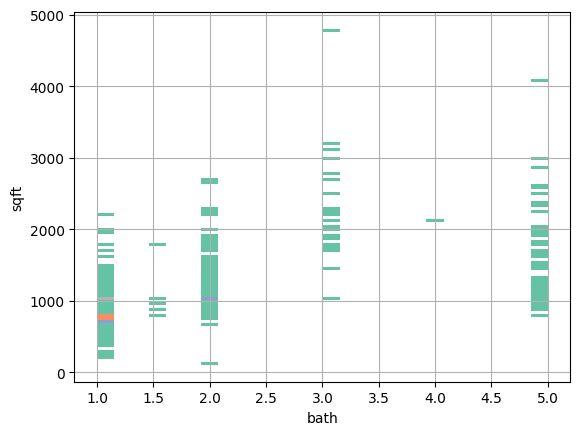

In [71]:
## YOUR CODE HERE
import matplotlib.pyplot as plt
sns.histplot(data=df, x='bath', y='sqft', cmap='Set2')
plt.grid()
plt.show()


## Task: How would you visualize the relationship between 'sqft' and 'price' in the dataset?

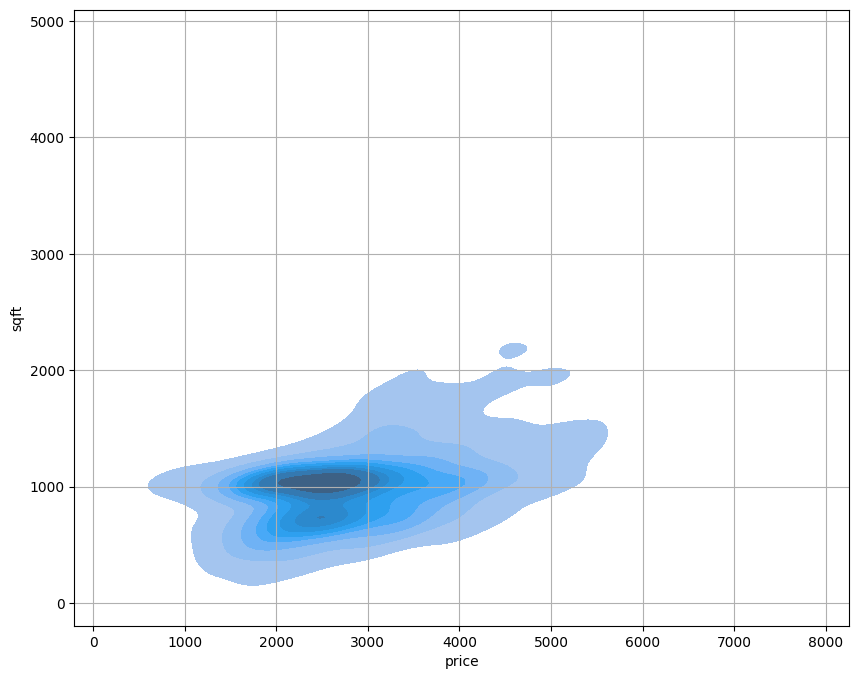

In [72]:
## YOUR CODE HERE
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.kdeplot(data=df, x='price', y='sqft', fill=True)
plt.grid()
plt.show()


## How can you modify previous plot to display the relationship between 'sqft' and 'price' using a logarithmic scale for both axes?

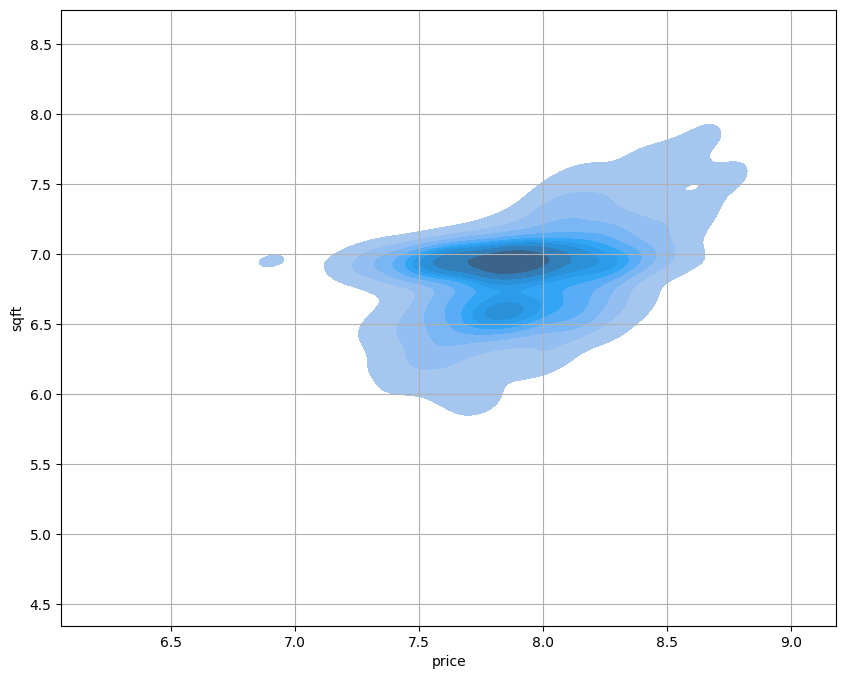

In [73]:
## YOUR CODE HERE
import numpy as np

plt.figure(figsize=(10,8))
sns.kdeplot(y=np.log(df['sqft']), x=np.log(df['price']), fill=True)
plt.grid()
plt.show()

## Task: How can you visualize the relationship between 'sqft' and 'price', while also incorporating 'bedrooms' and 'bath' in the plot?

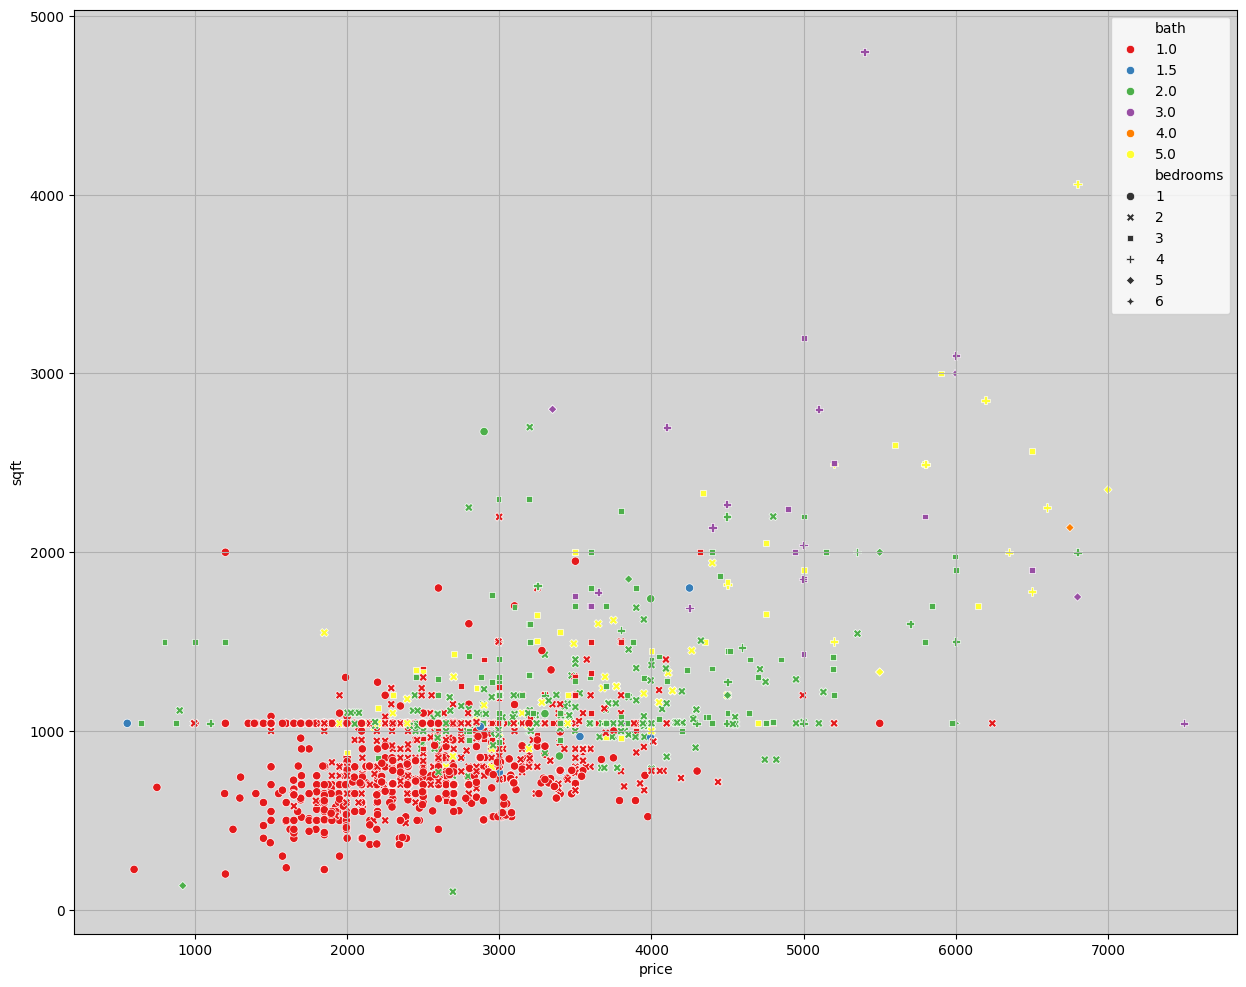

In [74]:
### YOUR CODE HERE
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
sns.scatterplot(data=df, x='price', y='sqft', hue='bath', style='bedrooms', palette='Set1')
ax.set_facecolor('lightgrey')
plt.grid()
plt.show()

## Spatial Granularity: Location

## Task: What is the relationship between the longitude, price and the number of bedrooms in a property ?

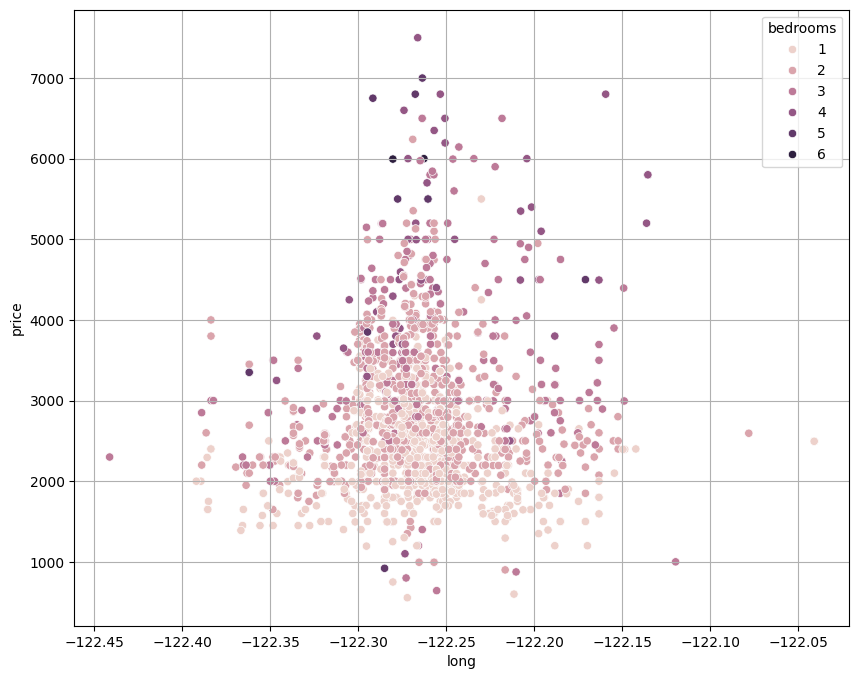

In [75]:
## YOUR CODE HERE
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='long', y='price', hue='bedrooms')
plt.grid()
plt.show()

## Task: What is the relationship between the latitude, price and the number of bedrooms in a property ?

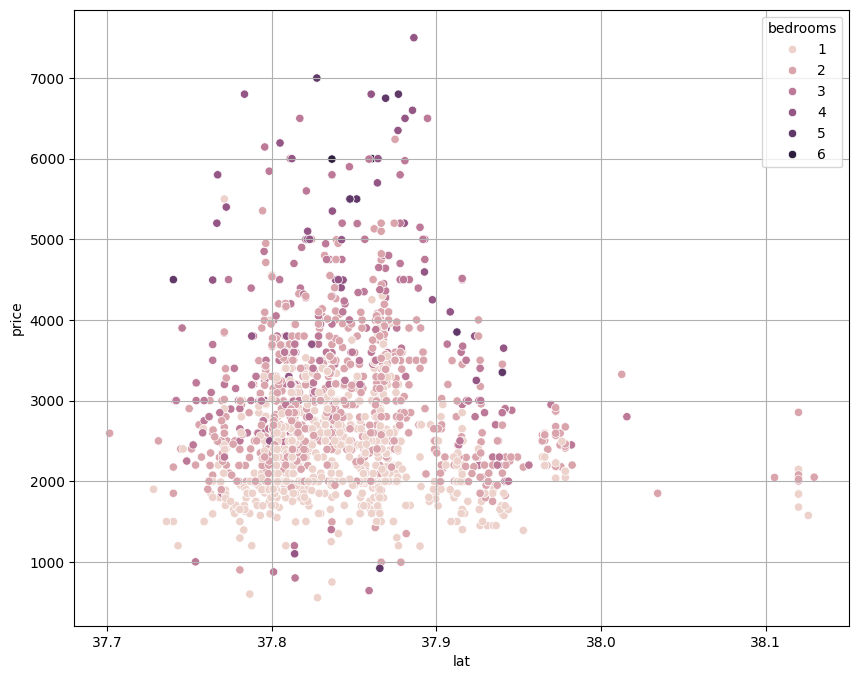

In [76]:
## YOUR CODE HERE
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='lat', y='price', hue='bedrooms')
plt.grid()
plt.show()

## Temporal Granularity 

### Task: How many rental adds are posted every day, week and month? 

In [77]:
## YOUR CODE HERE
days = df['posted']



# Regular Expressions 
Regular Expressions play a significant role in EDA by providing a powerful tool for searching, manipulating, and analyzing text data

### Example: Extract Social Security Number 

In [78]:
import re 
pattern = r'[0-9]{8}-[0-9]{4}'
text = 'My social number is 20230918-1234'
matches = re.findall(pattern, text)
for match in matches:
    print(match)

20230918-1234


## Task: Write a function with a regex for validating a date with YYYY-MM-DD format 

In [79]:
def validate_date(date_string):
    pattern = r'[0-9]{4}-[0-9]{2}-[0-9]{2}'
    if re.match(pattern, date_string):
        return True
    else:
        return False

In [80]:
date_string = '2023-03-39'
print(validate_date(date_string))

True
